# Multi-dimensional markov chain indexing 

In [2]:
%run ../notebook_preamble.ipy

import seaborn as sns
from snepits.pyovpyx import idx_to_state, el_f_gen

In [2]:
from snepits.pyovpyx import *
el_f_gen?

In [2]:
def create_state(Ns, R):
    """ Generate a random infection state (not evenly covered!) """
    A = len(Ns)  # Number of demographic levels
    
    def n_sum_to_k(n, k):
        """ n random numbers that sum to k"""
        sum_ = k
        out = []
        for ni in range(n-1):
            out.append(np.random.randint(low=0, high=sum_+1))
            sum_ -= out[-1]
        out.append(sum_)
        return out
    return np.concatenate([n_sum_to_k(R+1, N)[1:] for N in Ns])

Ns = np.array([2, 2])
R = 2  # Number of infection levels
create_state(Ns, R)

array([1, 0, 0, 1])

`create_state` doesn't sample states in a uniform way, just for illustrative purposes.

Actually, we can sample an integer uniformly and then use our `idx_to_state` method to convert to a state if we wanted to sample them (or an object resembling them) uniformly at random.

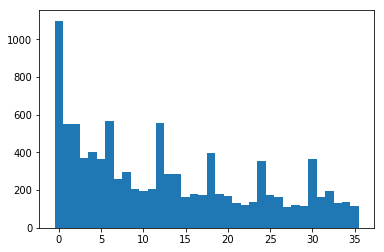

In [3]:
last_state = np.concatenate([np.eye(R, dtype=int)[-1, :] * n for n in Ns])
last_idx = el_f_gen(np.array(Ns), last_state)

plt.hist(
    [el_f_gen(np.array(Ns), create_state(Ns, R)) for _ in range(10000)],
    bins=np.arange(-0.5, last_idx + 1.5),
);

In [4]:
# Test applying transform and inverse gives back the same
for i in range(last_idx):
    print(i, end='-> ')
    data = idx_to_state(i, len(Ns), R, Ns)
    print(data, end='-> ')
    idx = el_f_gen(Ns, data)
    print(idx)
    assert i == idx, f"{i} != {idx}"

0-> [0 0 0 0]-> 0
1-> [0 0 1 0]-> 1
2-> [0 0 0 1]-> 2
3-> [0 0 2 0]-> 3
4-> [0 0 1 1]-> 4
5-> [0 0 0 2]-> 5
6-> [1 0 0 0]-> 6
7-> [1 0 1 0]-> 7
8-> [1 0 0 1]-> 8
9-> [1 0 2 0]-> 9
10-> [1 0 1 1]-> 10
11-> [1 0 0 2]-> 11
12-> [0 1 0 0]-> 12
13-> [0 1 1 0]-> 13
14-> [0 1 0 1]-> 14
15-> [0 1 2 0]-> 15
16-> [0 1 1 1]-> 16
17-> [0 1 0 2]-> 17
18-> [2 0 0 0]-> 18
19-> [2 0 1 0]-> 19
20-> [2 0 0 1]-> 20
21-> [2 0 2 0]-> 21
22-> [2 0 1 1]-> 22
23-> [2 0 0 2]-> 23
24-> [1 1 0 0]-> 24
25-> [1 1 1 0]-> 25
26-> [1 1 0 1]-> 26
27-> [1 1 2 0]-> 27
28-> [1 1 1 1]-> 28
29-> [1 1 0 2]-> 29
30-> [0 2 0 0]-> 30
31-> [0 2 1 0]-> 31
32-> [0 2 0 1]-> 32
33-> [0 2 2 0]-> 33
34-> [0 2 1 1]-> 34


In [6]:
idx_to_state?

[24 22 24 22]
[0 1 1 2 2 2 1 2 2 3 3 3 1 2 2 3 3 3 2 3 3 4 4 4 2 3 3 4 4 4 2 3 3 4 4]


Text(0.5, 1.0, 'Intensity of square == number of people in that state')

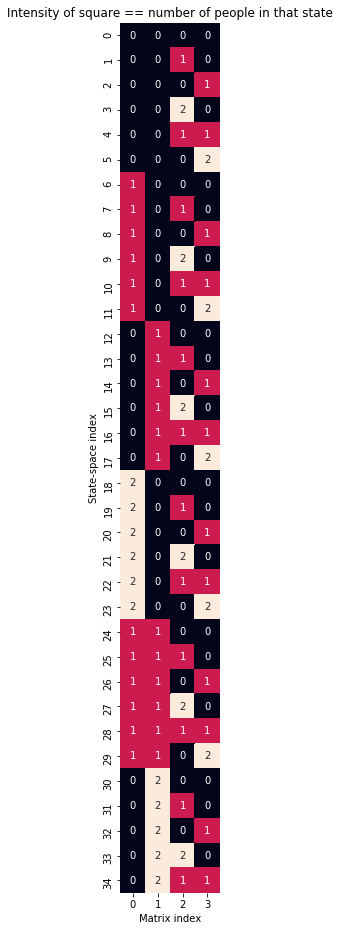

In [5]:
X = pd.DataFrame([idx_to_state(i, len(Ns), R, Ns) for i in range(last_idx)], )
print(X.values.sum(0))  # Sum column = Number infected in that matrix index state
print(X.values.sum(1))  # Sum row

fig, ax = plt.subplots(figsize=((9, 16)))
sns.heatmap(
    X,
    square=True,
    cbar=None,
    ax=ax,
    annot=True
)
ax.set_ylabel('State-space index')
ax.set_xlabel('Matrix index')
ax.set_title('Intensity of square == number of people in that state')
